# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [2]:
# Write your code here

import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

training_df = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['abstract'])
testing_df = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['abstract'])

training_df[['Sentiment','abstract']] = training_df["abstract"].str.split(" ", 1, expand=True)
testing_df[['Sentiment','astract']] = testing_df["abstract"].str.split(" ", 1, expand=True)



In [3]:
print(training_df.head())

                                            abstract Sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1


In [4]:
print(testing_df.head())

                                            abstract Sentiment  \
0   0 no movement , no yuks , not much of anything .         0   
1  0 a gob of drivel so sickly sweet , even the e...         0   
2  0 gangs of new york is an unapologetic mess , ...         0   
3  0 we never really feel involved with the story...         0   
4          1 this is one of polanski 's best films .         1   

                                             astract  
0     no movement , no yuks , not much of anything .  
1  a gob of drivel so sickly sweet , even the eag...  
2  gangs of new york is an unapologetic mess , wh...  
3  we never really feel involved with the story ,...  
4            this is one of polanski 's best films .  


In [5]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stp_wrds = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
word_net_lemmatizer= WordNetLemmatizer()

def cleaneddata(train_data):
  train_data ="".join([data.lower() for data in train_data if data not in string.punctuation])
  train_data = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", train_data)
  para = re.split('\W+',train_data)
  train_data = [word_net_lemmatizer.lemmatize(data) for data in para if data not in stp_wrds]
  return train_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(analyzer = cleaneddata)
tf_idf_vectorizer1 = tf_idf_vectorizer.fit_transform(training_df['abstract'])
tf_idf_vectorizer1.shape

(6920, 13343)

In [7]:
tf_idf_df = pd.DataFrame(tf_idf_vectorizer1.toarray())
tf_idf_df.columns=tf_idf_vectorizer.get_feature_names()
tf_idf_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,100minute,103minute,10course,10th,10thgrade,10year,10yearold,112minute,12,...,ziyi,zoe,zombie,zombieland,zone,zoning,zoom,zwick,zzzzzzzzz,élan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.049596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
Testing_tf_idf = tf_idf_vectorizer.transform(testing_df['abstract'])
print(Testing_tf_idf.shape)

(1821, 13343)


In [12]:
MulNB = MultinomialNB()
LSVC = LinearSVC()
KNNC = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XGBC = XGBClassifier()

In [25]:
training_data1, testing_data1, training_data2, testing_data2 = train_test_split(tf_idf_vectorizer1, training_df['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [27]:
DT_fit = DTC.fit(training_data1,training_data2)
final_DT = DT_fit.predict(testing_data1)
print('Accuracy_result %s' % accuracy_score(final_DT,testing_data2))
print(classification_report(testing_data2,final_DT))

Accuracy_result 0.6524566473988439
              precision    recall  f1-score   support

           0       0.65      0.61      0.63       671
           1       0.65      0.69      0.67       713

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384



In [28]:
MulNB_fit = MulNB.fit(training_data1,training_data2)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
final_MulNB = MulNB_fit.predict(testing_data1)
print('Accuracy_result %s' % accuracy_score(final_MulNB,testing_data2))
print(classification_report(testing_data2,final_MulNB))

Accuracy_result 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [30]:
from sklearn.model_selection import cross_val_score
output = cross_val_score(MulNB, testing_data1, testing_data2, cv=10)
print("MNB_given",output.mean())

MNB_given 0.7247054530288813


In [31]:
LSVC_fit = LSVC.fit(training_data1,training_data2)
final_LSVC = LSVC_fit.predict(testing_data1)
print('Accuracy_result %s' % accuracy_score(final_LSVC,testing_data2))
print(classification_report(testing_data2,final_LSVC))

Accuracy_result 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [32]:
from sklearn.model_selection import cross_val_score
output = cross_val_score(LSVC, testing_data1, testing_data2, cv=10)
print("SVM_given",output.mean())

SVM_given 0.7348034615785632


In [33]:
KNNC_fit = KNNC.fit(training_data1,training_data2)
final_KNNC = KNNC_fit.predict(testing_data1)
print('Accuracy_result %s' % accuracy_score(final_KNNC,testing_data2))
print(classification_report(testing_data2,final_KNNC))

Accuracy_result 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [34]:
from sklearn.model_selection import cross_val_score
output = cross_val_score(KNNC, testing_data1, testing_data2, cv=10)
print("KNN_given",output.mean())

KNN_given 0.6675737670732979


In [35]:
XGBC_fit = XGBC.fit(training_data1,training_data2)
final_XGBC = XGBC_fit.predict(testing_data1)
output = cross_val_score(XGBC, testing_data1, testing_data2, cv=10)
print('Accuracy_result %s' % accuracy_score(final_XGBC,testing_data2))
print(classification_report(testing_data2,final_XGBC))
print("XGB_given",output.mean())

Accuracy_result 0.6488439306358381
              precision    recall  f1-score   support

           0       0.76      0.41      0.53       671
           1       0.61      0.88      0.72       713

    accuracy                           0.65      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.65      0.63      1384

XGB_given 0.6198884370764259


In [36]:
output = cross_val_score(DTC, testing_data1, testing_data2, cv=10)
print("DT_given",output.mean())

DT_given 0.6061151079136691


In [37]:
RF_fit = RFC.fit(training_data1,training_data2)
final_RF = RF_fit.predict(testing_data1)
output = cross_val_score(RFC, testing_data1, testing_data2, cv=10)
print('Acc_result %s' % accuracy_score(final_RF,testing_data2))
print(classification_report(testing_data2,final_RF))
print("RF_given",output.mean())

Acc_result 0.7384393063583815
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       671
           1       0.71      0.82      0.76       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

RF_given 0.684918152434574


In [38]:
Testing_MulNB_fit = MulNB_fit.predict(Testing_tf_idf)
print('Accuracy_result %s' % accuracy_score(Testing_MulNB_fit,testing_df['Sentiment']))
print(classification_report(Testing_MulNB_fit,testing_df['Sentiment']))


Accuracy_result 0.7940691927512356
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       729
           1       0.89      0.74      0.81      1092

    accuracy                           0.79      1821
   macro avg       0.79      0.81      0.79      1821
weighted avg       0.81      0.79      0.80      1821



In [39]:
Testing_LSVC_fit = LSVC_fit.predict(Testing_tf_idf)
print('Accuracy_result %s' % accuracy_score(Testing_LSVC_fit,testing_df['Sentiment']))
print(classification_report(Testing_LSVC_fit,testing_df['Sentiment']))

Accuracy_result 0.7869302580999451
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       838
           1       0.83      0.77      0.79       983

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [43]:
import pandas as pds
import gensim
Dataframe=pds.read_csv("/content/Amazon_Unlocked_Mobile.csv")
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from textblob import Word
nltk.download('wordnet')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
Dataframe = Dataframe[Dataframe['Reviews'].notnull()]
dataframe = Dataframe
stop = stopwords.words('english')
Dataframe['puncless'] = Dataframe['Reviews'].str.replace('[^\w\s].#','')
Dataframe['mstopwords'] =Dataframe['puncless'].apply(lambda i: " ".join(i for i in i.split() if i not in stop))
Dataframe['numbers']=Dataframe['mstopwords'].str.replace('[0-9]','')
Dataframe['lowest'] =Dataframe['numbers'].apply(lambda i: " ".join(i.lower() for i in i.split()))

Dataframe['stemming']=Dataframe['lowest'].apply(lambda i: " ".join([stemmer.stem(word) for word in i.split()]))
Dataframe['freshdata'] = Dataframe['stemming'].apply(lambda i: " ".join([Word(word).lemmatize() for word in i.split()]))





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [44]:
print(Dataframe['freshdata'].head())

0    i feel lucki found use (phone u & use hard all...
1    nice phone, nice grade pantach revue. veri cle...
2                                            veri plea
3      it work good goe slow sometim good phone i love
4    great phone replac lost phone. the thing volum...
Name: freshdata, dtype: object


In [45]:
Dataframe1=(dataframe.sample(n=4000)).reset_index()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()
tf_idf_output = tf_idf_vectorizer.fit_transform(Dataframe1['freshdata'].values)
print(tf_idf_output.shape)

(4000, 6574)


In [47]:
from sklearn.cluster import KMeans
Kmean_tf_idf = KMeans(n_clusters = 5,random_state=99)
Kmean_tf_idf.fit(tf_idf_output)

KMeans(n_clusters=5, random_state=99)

In [48]:
tf_idf_labelling = Kmean_tf_idf.labels_
tf_idf_clust=Kmean_tf_idf.cluster_centers_

In [49]:
v = tf_idf_vectorizer.get_feature_names()
v[1:5]
Dataframe1['tf_idf cluster labelling'] = tf_idf_labelling
Dataframe1.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,puncless,mstopwords,numbers,lowest,stemming,freshdata,tf_idf cluster labelling
0,134721,BLU Studio 5.0 C HD - Unlocked Cell Phones - R...,BLU,2000.00,5.0,I like the phone,0.0,I like the phone,I like phone,I like phone,i like phone,i like phone,i like phone,3
1,104249,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,1.0,Battery life sucks! Had it only a week or so a...,0.0,Battery life sucks! Had it only a week or so a...,Battery life sucks! Had week I bring chager ev...,Battery life sucks! Had week I bring chager ev...,battery life sucks! had week i bring chager ev...,batteri life sucks! had week i bring chager ev...,batteri life sucks! had week i bring chager ev...,3
2,115167,"BLU Dash M - 5.0"" Smartphone - Global GSM Unlo...",BLU,69.99,5.0,nice phone,0.0,nice phone,nice phone,nice phone,nice phone,nice phone,nice phone,3
3,126005,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,5.0,One of the best BLU phone that we owned . My D...,0.0,One of the best BLU phone that we owned . My D...,One best BLU phone owned . My Daughter love it...,One best BLU phone owned . My Daughter love it...,one best blu phone owned . my daughter love it...,one best blu phone own . my daughter love it. ...,one best blu phone own . my daughter love it. ...,3
4,198320,HTC Sensation XE Z715E with Beats Audio Unlock...,NaN,171.99,1.0,"It came locked, without the original box nor t...",0.0,"It came locked, without the original box nor t...","It came locked, without original box Beats ear...","It came locked, without original box Beats ear...","it came locked, without original box beats ear...","it came locked, without origin box beat earpho...","it came locked, without origin box beat earpho...",3


In [50]:

Dataframe1.groupby(['tf_idf cluster labelling'])['freshdata'].count()

tf_idf cluster labelling
0     121
1     246
2     200
3    3252
4     181
Name: freshdata, dtype: int64

In [52]:
clusters = Kmean_tf_idf.cluster_centers_.argsort()[:, ::-1]
for i in range(1,5):
    print("Cluster No %d:" % i, end='')
    for index in clusters[i, :7]:
        print(' %s' % v[index], end='')
        print()

Cluster No 1: love
 ok
 it
 phone
 great
 daughter
 my
Cluster No 2: great
 phone
 work
 product
 price
 it
 condit
Cluster No 3: phone
 work
 it
 good
 the
 use
 like
Cluster No 4: good
 veri
 phone
 price
 thank
 product
 it


In [54]:
from sklearn.cluster import DBSCAN
import numpy as npy
import matplotlib.pyplot as plt
import gensim
m=0
vector_list=[]
for n in Dataframe1['freshdata'].values:
    vector_list.append(n.split())
mdl_words = gensim.models.Word2Vec(vector_list,size=100, workers=4)
import numpy as npy
vector_values = [];
for n in vector_list:
    v1 = npy.zeros(100)
    c = 0;
    for w in n:
        try:
            v2 = mdl_words.wv[w]
            v1 += v2
            c += 1
        except:
            pass
    v1 /= c
    vector_values.append(v1)
vector_values = npy.array(vector_values)
vector_values = npy.nan_to_num(vector_values)
vector_values.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


(4000, 100)

In [57]:
points = 2 * 100
def lower_bound(num, reach): 
    lower, upper = 0, len(num) - 1
    while lower <= upper: 
        count = int(lower + (upper - lower) / 2)
        if num[count] >= reach:
            upper = count - 1
        else:
            lower = count + 1
    return lower

def computing (i, text): 
    distance_values = []
    for data in text:
        dist = npy.sum((i - data) **2 ) 
        if(len(distance_values) == 200 and distance_values[199] > dist): 
            low = int(lower_bound(distance_values, dist))
            if low < 200 and low >= 0 and distance_values[low] > dist:
                distance_values[low] = dist
        else:
            distance_values.append(dist)
            distance_values.sort()
    
    return distance_values[199]

In [56]:
neighbours = []
for i in vector_values[:500]:
    neighbours.append(computing(i, vector_values[:500]) )
neighbours.sort()

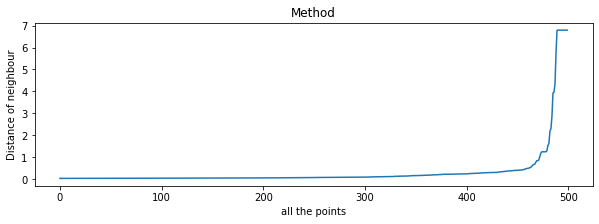

In [58]:
plt.figure(figsize=(10,3))
plt.title("Method")
plt.plot([i for i in range(len(neighbours))], neighbours)
plt.xlabel("all the points")
plt.ylabel("Distance of neighbour")
plt.show()

In [59]:
d = DBSCAN(eps = 8, min_samples = points, n_jobs=-2)
d.fit(vector_values)
Dataframe1['WMword design'] = d.labels_
Dataframe1.head(4)

,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,puncless,mstopwords,numbers,lowest,stemming,freshdata,tf_idf cluster labelling,WMword design
0,134721,BLU Studio 5.0 C HD - Unlocked Cell Phones - R...,BLU,2000.00,5.0,I like the phone,0.0,I like the phone,I like phone,I like phone,i like phone,i like phone,i like phone,3,0
1,104249,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,1.0,Battery life sucks! Had it only a week or so a...,0.0,Battery life sucks! Had it only a week or so a...,Battery life sucks! Had week I bring chager ev...,Battery life sucks! Had week I bring chager ev...,battery life sucks! had week i bring chager ev...,batteri life sucks! had week i bring chager ev...,batteri life sucks! had week i bring chager ev...,3,0
2,115167,"BLU Dash M - 5.0"" Smartphone - Global GSM Unlo...",BLU,69.99,5.0,nice phone,0.0,nice phone,nice phone,nice phone,nice phone,nice phone,nice phone,3,0
3,126005,BLU Life 8 XL Smartphone - Unlocked - US GSM -...,BLU,101.91,5.0,One of the best BLU phone that we owned . My D...,0.0,One of the best BLU phone that we owned . My D...,One best BLU phone owned . My Daughter love it...,One best BLU phone owned . My Daughter love it...,one best blu phone owned . my daughter love it...,one best blu phone own . my daughter love it. ...,one best blu phone own . my daughter love it. ...,3,0


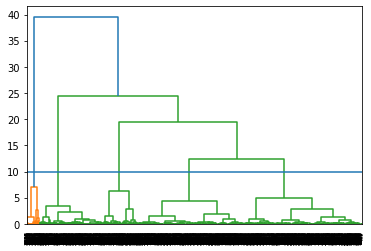

In [61]:
import scipy
from scipy.cluster import hierarchy
Dendogram = hierarchy.dendrogram(hierarchy.linkage(vector_values,method='ward'))
plt.axhline(y=10)

In [62]:
from sklearn.cluster import AgglomerativeClustering

analysis = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
Agg = analysis.fit_predict(vector_values)
Dataframe1['WMword cluster'] = analysis.labels_
Dataframe1.head(6)
Dataframe1.groupby(['WMword cluster'])['freshdata'].count()

WMword cluster
0    1405
1    1276
2     758
3      57
4     177
5      93
6     234
Name: freshdata, dtype: int64

In [64]:
for m in range(6):
    print("sentence", m) #reviews assigned to cluster
    print(Dataframe1.iloc[Dataframe1.groupby(['WMword cluster']).groups[m][0]]['freshdata'])
    print(Dataframe1.iloc[Dataframe1.groupby(['WMword cluster']).groups[m][1]]['freshdata'])


sentence 0
batteri life sucks! had week i bring chager everywher phone. plan get new phone soon i can.
one best blu phone own . my daughter love it. big screen, fast interface. the wifi work perfectly, lose signal. take nice pic video.th best price.....i buy anoth one sure.
sentence 1
it came locked, without origin box beat earphon (cheap plastic earphon instead). in way anoth call scam.
wife work corectli
sentence 2
i like phone
nice phone
sentence 3
cool
:)
sentence 4
easy, easy, easy. good
return product. too fragil minim market replac part
sentence 5
excelente!
a+


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

Clustering generally refers to the grouping of related objects or the differentiation.Hierarchy clustering is the The collection of clusters that are produced by hierarchical clustering are organized in a hierarchy. To create the clusters, it uses a similarity or distance matrix.Data are divided depending on the number of clusters using the K means clustering method.In this custering it has to aasume the number of clusters where as in heirarcy no need of assuming as it uses the distance vector.In a dense based scan, the item density determines how dense the clusters are. In this, the minimum number of points will be used to build the clusters.It also need not to assume the number of clusters randomly.
